In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("spotify-2023.csv", encoding='latin1')

# Convert object columns to numeric where applicable (e.g., 'streams')
numeric_cols = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 
                'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Check data types
print(data.dtypes)


track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object


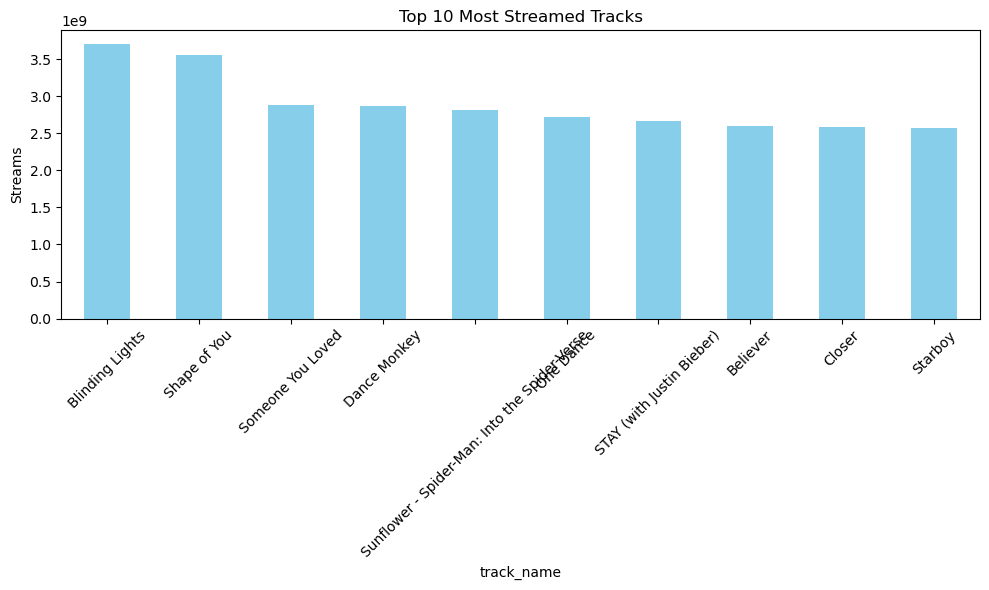

In [2]:
# Aggregate streams by track_name
top_tracks = data.groupby('track_name')['streams'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_tracks.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Streamed Tracks')
plt.ylabel('Streams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


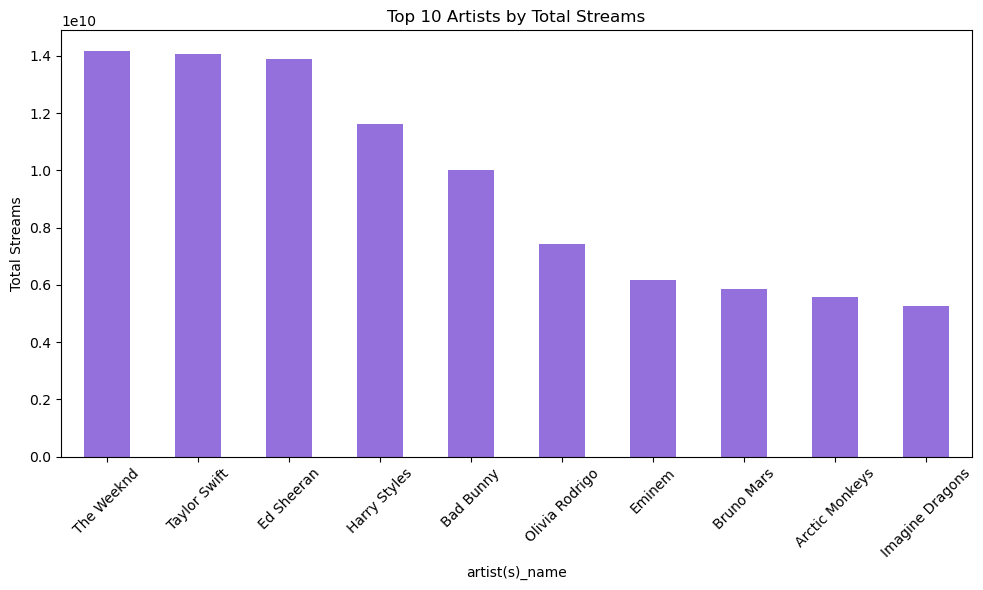

In [9]:
# Aggregate streams by artist(s)_name
top_artists = data.groupby("artist(s)_name")['streams'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='mediumpurple')
plt.title('Top 10 Artists by Total Streams')
plt.ylabel('Total Streams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


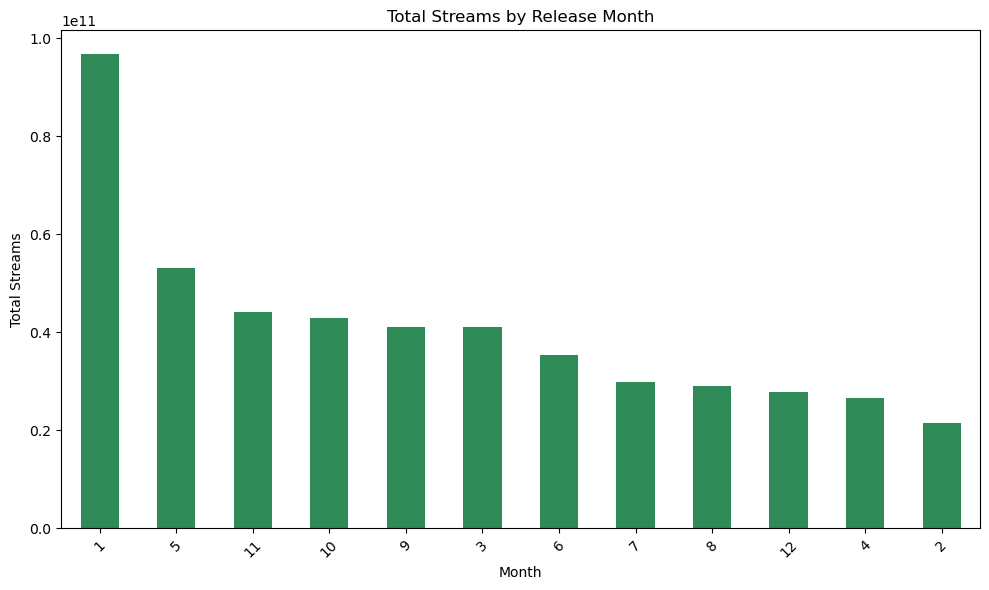

In [10]:
# Aggregate streams by released_month
monthly_streams = data.groupby('released_month')['streams'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
monthly_streams.plot(kind='bar', color='seagreen')
plt.title('Total Streams by Release Month')
plt.ylabel('Total Streams')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


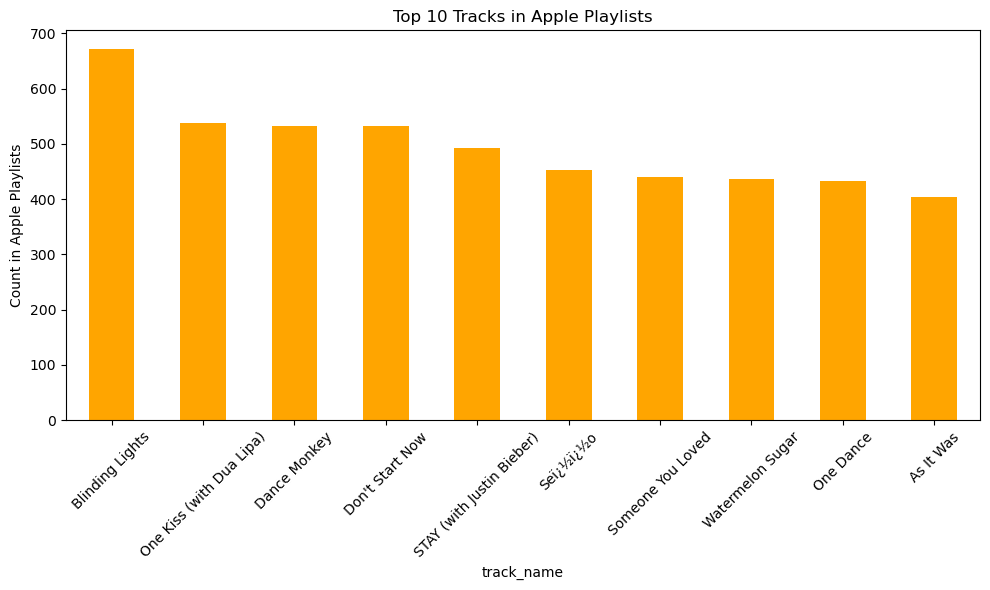

In [11]:
# Aggregate Apple playlist data
top_apple_tracks = data.groupby('track_name')['in_apple_playlists'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_apple_tracks.plot(kind='bar', color='orange')
plt.title('Top 10 Tracks in Apple Playlists')
plt.ylabel('Count in Apple Playlists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


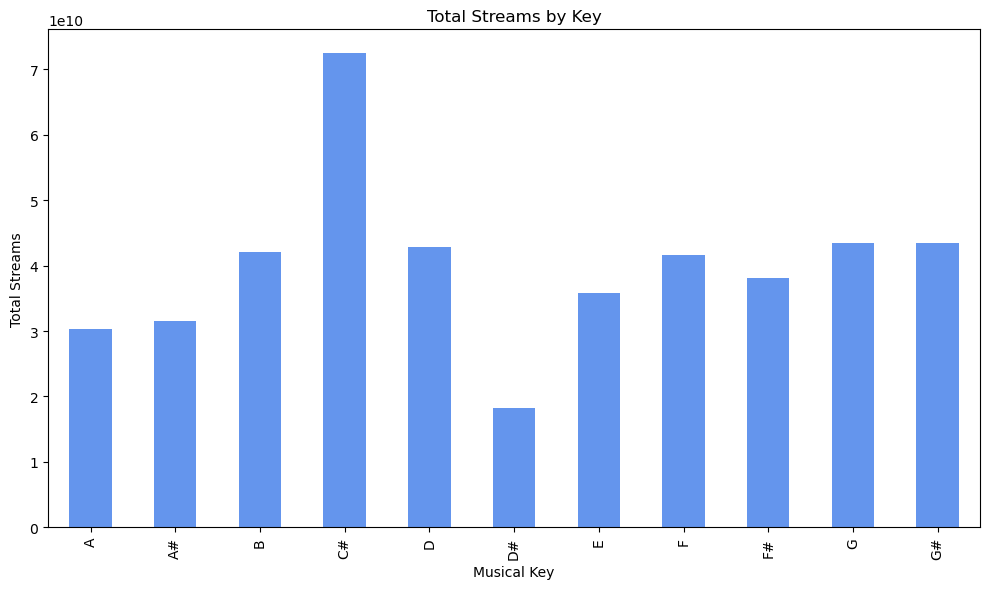

In [12]:
# Aggregate streams by musical key
streams_by_key = data.groupby('key')['streams'].sum()

# Plot
plt.figure(figsize=(10, 6))
streams_by_key.plot(kind='bar', color='cornflowerblue')
plt.title('Total Streams by Key')
plt.ylabel('Total Streams')
plt.xlabel('Musical Key')
plt.tight_layout()
plt.show()


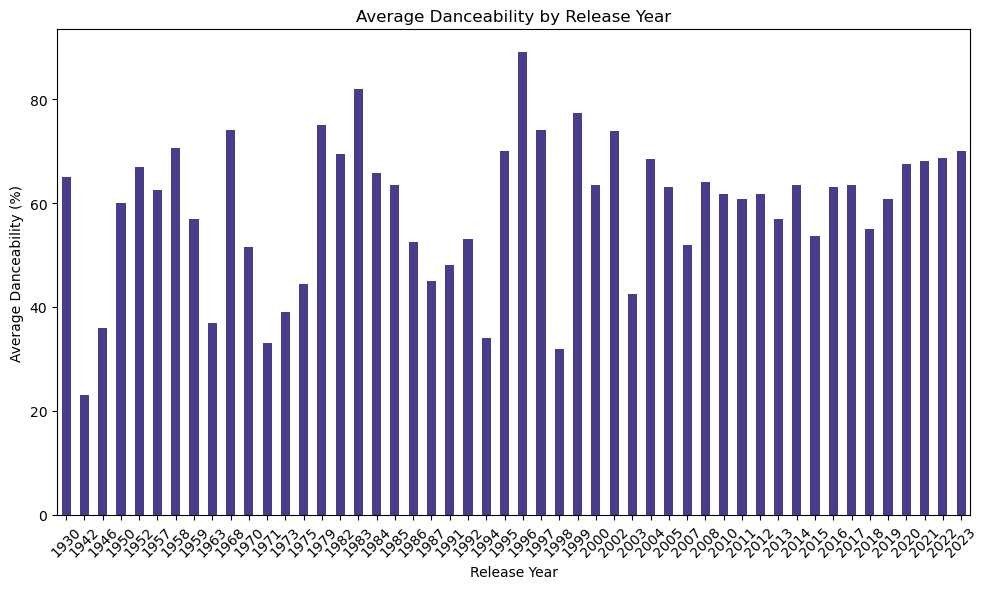

In [13]:
# Aggregate average danceability by year
avg_danceability = data.groupby('released_year')['danceability_%'].mean()

# Plot
plt.figure(figsize=(10, 6))
avg_danceability.plot(kind='bar', color='darkslateblue')
plt.title('Average Danceability by Release Year')
plt.ylabel('Average Danceability (%)')
plt.xlabel('Release Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


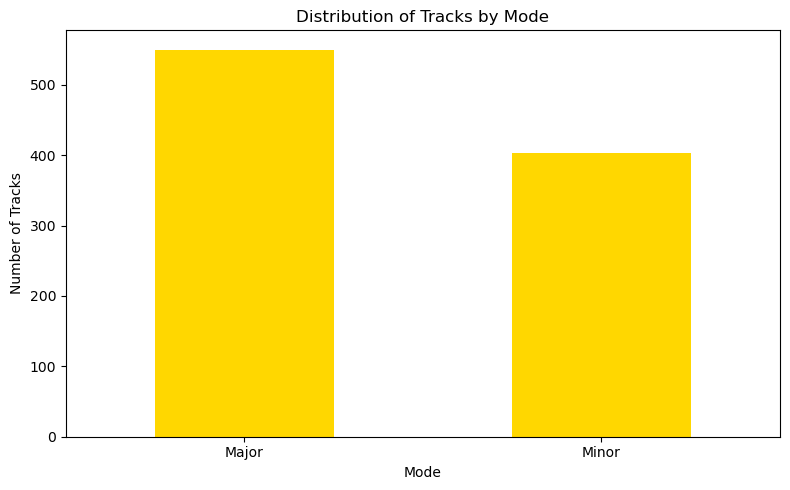

In [14]:
# Count tracks by mode
tracks_by_mode = data['mode'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
tracks_by_mode.plot(kind='bar', color='gold')
plt.title('Distribution of Tracks by Mode')
plt.ylabel('Number of Tracks')
plt.xlabel('Mode')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


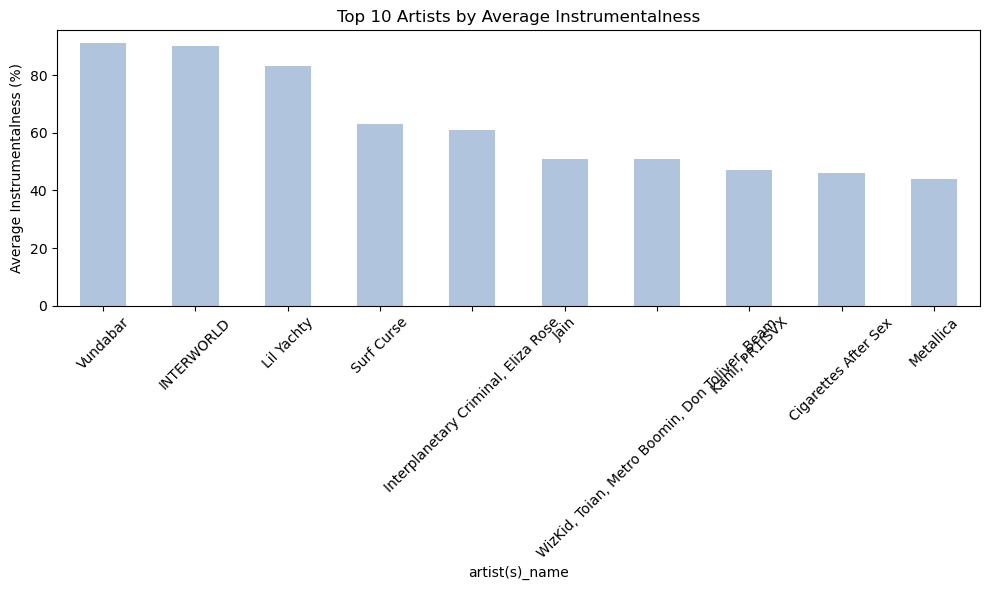

In [15]:
# Aggregate instrumentalness by artist(s)_name
top_instrumental_artists = data.groupby('artist(s)_name')['instrumentalness_%'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_instrumental_artists.plot(kind='bar', color='lightsteelblue')
plt.title('Top 10 Artists by Average Instrumentalness')
plt.ylabel('Average Instrumentalness (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\theab\AppData\Local\Temp\ipykernel_27812\1760697232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='in_spotify_playlists', data=data, palette='viridis')


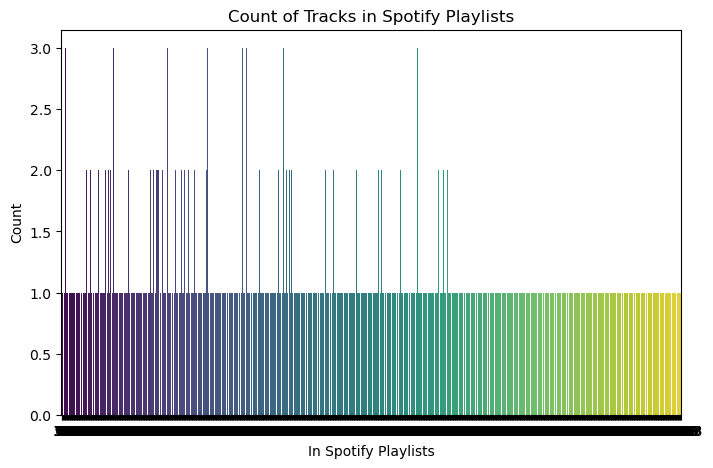

In [3]:
plt.figure(figsize=(8, 5))
sns.countplot(x='in_spotify_playlists', data=data, palette='viridis')
plt.title('Count of Tracks in Spotify Playlists')
plt.xlabel('In Spotify Playlists')
plt.ylabel('Count')
plt.show()


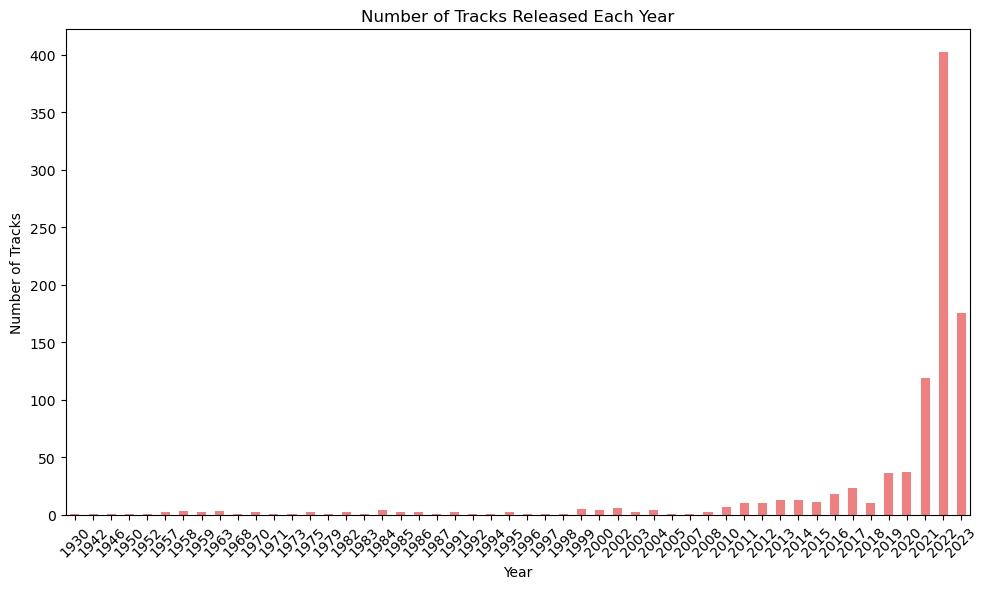

In [4]:
# Group by release year
yearly_tracks = data.groupby('released_year')['track_name'].count()

# Plot
plt.figure(figsize=(10, 6))
yearly_tracks.plot(kind='bar', color='lightcoral')
plt.title('Number of Tracks Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


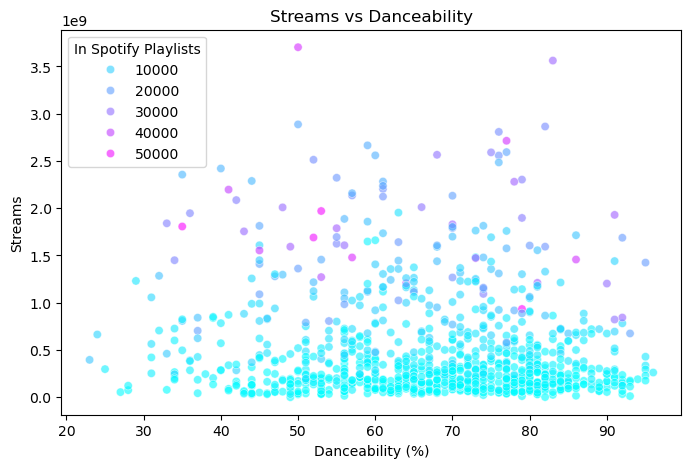

In [5]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='danceability_%', y='streams', data=data, alpha=0.6, hue='in_spotify_playlists', palette='cool')
plt.title('Streams vs Danceability')
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')
plt.legend(title='In Spotify Playlists')
plt.show()


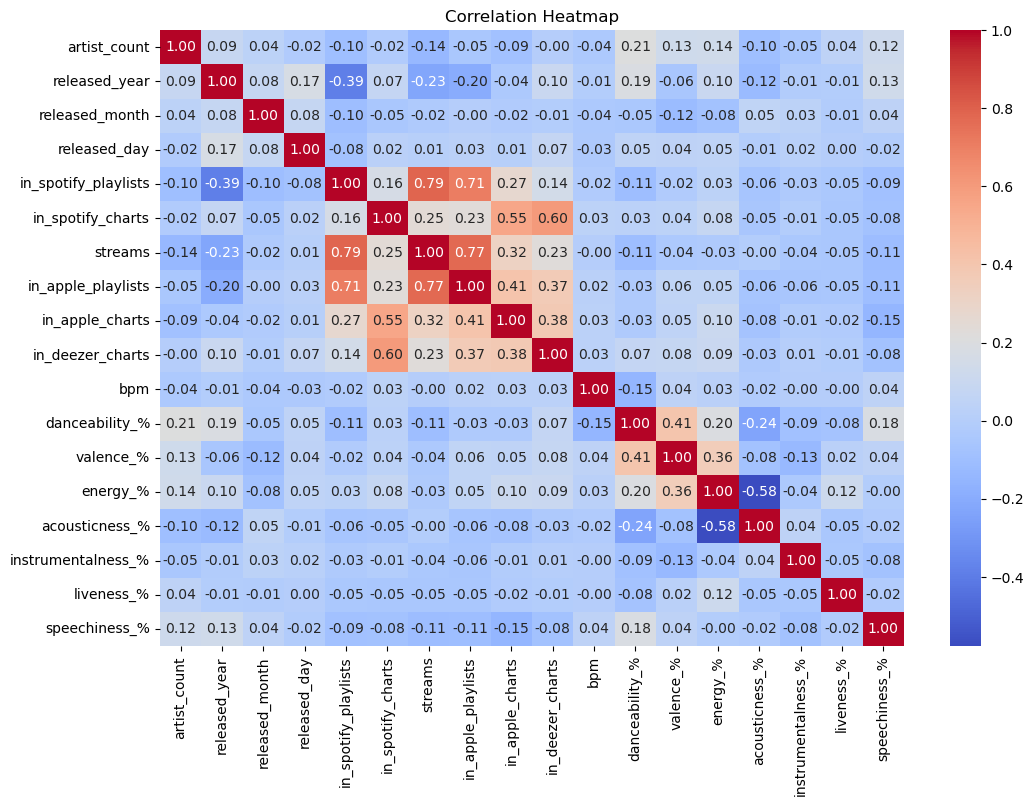

In [6]:
# Select numeric data for correlation
numeric_data = data.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


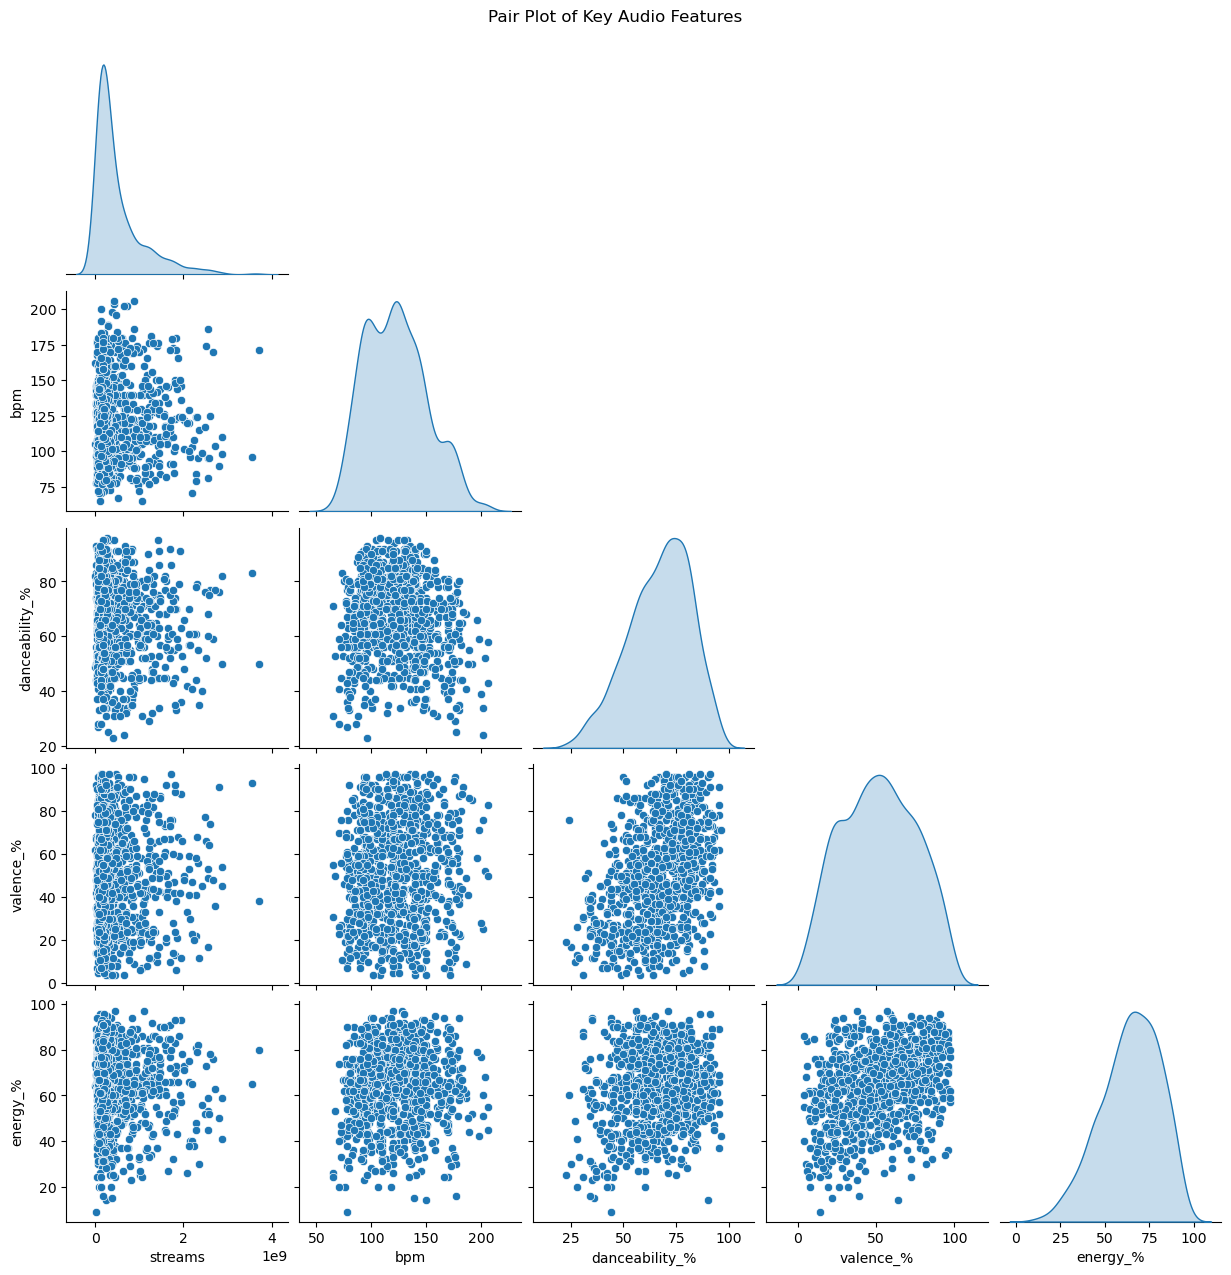

In [7]:
sns.pairplot(data[['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%']], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Key Audio Features', y=1.02)
plt.show()


C:\Users\theab\AppData\Local\Temp\ipykernel_27812\1007545743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mode', y='streams', data=data, palette='Set2')


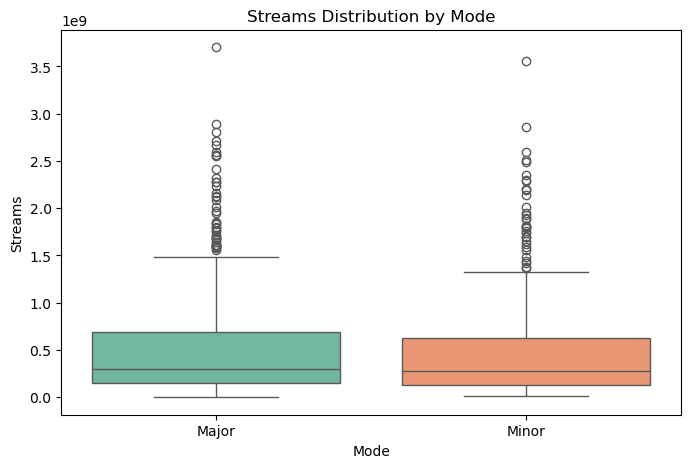

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='mode', y='streams', data=data, palette='Set2')
plt.title('Streams Distribution by Mode')
plt.xlabel('Mode')
plt.ylabel('Streams')
plt.show()


## Conclusion 
Here’s a simple conclusion based on the data analysis:

1. **Top Artists and Tracks**: A few artists and tracks dominate streams, showing that popularity is concentrated among a small group.  
2. **Release Trends**: Certain months and years have higher releases or streams, hinting at seasonal preferences or trends in music.  
3. **Musical Features**: Features like danceability, energy, and instrumentalness impact the popularity of tracks.  
4. **Playlists Influence**: Inclusion in Spotify and Apple playlists significantly boosts a track's streams.  
5. **Diverse Genres**: Tracks with different modes, keys, and unique features attract varied listener bases, highlighting diversity in preferences.